In [61]:
#import required libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

#Load the csv file
df = pd.read_csv('/Users/mamathashetty/LendingClubCaseStudy/loan.csv')

#print the head 
print(df.head())



        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

/Users/mamathashetty/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [62]:
#print tail
print(df.tail())


          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN       

In [63]:
#print shape to understand the rows and column size of data frame
print(df.shape)


(39717, 111)


In [64]:
#print describe to get mean,median and other standard values of numeric columns, which will help to understand the outliers
print(df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [65]:
df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Drop the irrelevant columns from column no 49 i.e collections_12_mths_ex_med. All of the remaining columns are either having Null or NA or only few records have values, which cannot be used for analysis.

In [66]:
#Drop columns which are not useful
df.drop(df.columns[49:], axis='columns', inplace=True)
df.drop(["pymnt_plan", "url"], axis='columns', inplace=True)


In [67]:
#Interest rate - Convert it to numeric value - Float
df['int_rate'] = df['int_rate'].apply(lambda x: float(str(x).rstrip("%")))
print(df["int_rate"])

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64


In [68]:
#Treat employee length data, fill na values as 0
df.emp_length.unique()
df.emp_length.fillna('0',inplace=True)
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', '0'],
      dtype=object)

In [69]:
#Create a custom column for purpose, so that it is convenient for plotting the graph
def purpose_new(x):
        if  x == "debt_consolidation":
            return "dc"
        elif x =='other':
            return 'oth'
        elif x =='credit_card':
            return 'cc'
        elif x =='small_business':        
            return 'sb'
        elif x =='home_improvement':        
            return 'hi'
        elif x =='major_purchase':
            return 'mp'
        elif x =='car':
            return 'car'
        elif x =='medical':
            return 'med'
        elif x =='wedding':        
            return 'wed'
        elif x =='house':        
            return 'home'
        elif x =='educational':
            return 'edu'
        elif x =='vacation':        
            return 'vac'
        elif x =='renewable_energy':        
            return 're'
        else:
            return 'NA'

df['purpose_new'] = df['purpose'].apply(lambda x: purpose_new(x))

In [70]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,...,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,...,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,...,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,...,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,...,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,...,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


In [71]:
#Univariate Analysis
#Find out the highest charge off percentage based on purpose
#calculate percentage
def percentage(num1, num2):
    result = num1/num2
    return result*100

#get total customer based on purpose, loan status
dfNew = df.groupby(['purpose','loan_status'])['member_id'].count().reset_index()

#get total customer based on purpose
test1 = dfNew.groupby(['purpose']).sum().reset_index()
test1['loan_status'] = 'Total' 

#Concat both DF's to have proper count that will help to calcuate percentage
frames = [dfNew,test1]
mergedResult = pd.concat(frames)
result = mergedResult.groupby(['purpose','loan_status'],as_index = False).sum().pivot('purpose','loan_status').fillna(0)

result['CO'] = result[[('member_id', 'Charged Off')]]
result['FP'] = result[[('member_id', 'Fully Paid')]]
result['Cu'] = result[[('member_id', 'Current')]]
result['T'] = result[[('member_id', 'Total')]]

#Add percentage calcultation at group by purpose
result['per_chargedoff'] = percentage(result['CO'], result['T'])
result['per_fullyPaid'] = percentage(result['FP'], result['T'])
result['per_Current'] = percentage(result['Cu'], result['T'])

#print the result, sorting in percetage of charged off
print(result.sort_values(by=['per_chargedoff'],ascending=False))
#print(result.dtypes.keys())

#CONCLUSION: AS PER THE RESULT TABLE BELOW loans provided for small business has highest percentage of charge off i.e 25%

                     member_id                                  CO       FP  \
loan_status        Charged Off Current Fully Paid    Total                    
purpose                                                                       
small_business           475.0    74.0     1279.0   1828.0   475.0   1279.0   
renewable_energy          19.0     1.0       83.0    103.0    19.0     83.0   
educational               56.0     0.0      269.0    325.0    56.0    269.0   
other                    633.0   128.0     3232.0   3993.0   633.0   3232.0   
moving                    92.0     7.0      484.0    583.0    92.0    484.0   
house                     59.0    14.0      308.0    381.0    59.0    308.0   
medical                  106.0    12.0      575.0    693.0   106.0    575.0   
debt_consolidation      2767.0   586.0    15288.0  18641.0  2767.0  15288.0   
vacation                  53.0     6.0      322.0    381.0    53.0    322.0   
home_improvement         347.0   101.0     2528.0   

In [72]:
#Find out the highest charge off percentage based on pupose

#get total customer based on purpose, loan status
dfNew = df.groupby(['home_ownership','loan_status'])['member_id'].count().reset_index()

#get total customer based on purpose
test1 = dfNew.groupby(['home_ownership']).sum().reset_index()
test1['loan_status'] = 'Total' 

#Concat both DF's to have proper count that will help to calcuate percentage
frames = [dfNew,test1]
mergedResult = pd.concat(frames)
result = mergedResult.groupby(['home_ownership','loan_status'],as_index = False).sum().pivot('home_ownership','loan_status').fillna(0)

result['CO'] = result[[('member_id', 'Charged Off')]]
result['FP'] = result[[('member_id', 'Fully Paid')]]
result['Cu'] = result[[('member_id', 'Current')]]
result['T'] = result[[('member_id', 'Total')]]

#Add percentage calcultation at group by purpose
result['per_chargedoff'] = percentage(result['CO'], result['T'])
result['per_fullyPaid'] = percentage(result['FP'], result['T'])
result['per_Current'] = percentage(result['Cu'], result['T'])

#print the result, sorting in percetage of charged off
print(result.sort_values(by=['per_chargedoff'],ascending=False))
#print(result.dtypes.keys())

#CONCLUSION: AS PER THE RESULT TABLE BELOW loans provided with home ownership as 'Other' has highest percentage of charge off i.e 18%
#Followed by Rent - 15%

                 member_id                                  CO       FP  \
loan_status    Charged Off Current Fully Paid    Total                    
home_ownership                                                            
OTHER                 18.0     0.0       80.0     98.0    18.0     80.0   
RENT                2839.0   419.0    15641.0  18899.0  2839.0  15641.0   
OWN                  443.0    83.0     2532.0   3058.0   443.0   2532.0   
MORTGAGE            2327.0   638.0    14694.0  17659.0  2327.0  14694.0   
NONE                   0.0     0.0        3.0      3.0     0.0      3.0   

                   Cu        T per_chargedoff per_fullyPaid per_Current  
loan_status                                                              
home_ownership                                                           
OTHER             0.0     98.0      18.367347     81.632653    0.000000  
RENT            419.0  18899.0      15.021959     82.760993    2.217049  
OWN              83.0   3058.

In [73]:
#Find out the highest charge off percentage based on employment length

#get total customer based on employment length, loan status
dfNew = df.groupby(['emp_length','loan_status'])['member_id'].count().reset_index()

#get total customer based on purpose
test1 = dfNew.groupby(['emp_length']).sum().reset_index()
test1['loan_status'] = 'Total' 

#Concat both DF's to have proper count that will help to calcuate percentage
frames = [dfNew,test1]
mergedResult = pd.concat(frames)
result = mergedResult.groupby(['emp_length','loan_status'],as_index = False).sum().pivot('emp_length','loan_status').fillna(0)

result['CO'] = result[[('member_id', 'Charged Off')]]
result['FP'] = result[[('member_id', 'Fully Paid')]]
result['Cu'] = result[[('member_id', 'Current')]]
result['T'] = result[[('member_id', 'Total')]]

#Add percentage calcultation at group by purpose
result['per_chargedoff'] = percentage(result['CO'], result['T'])
result['per_fullyPaid'] = percentage(result['FP'], result['T'])
result['per_Current'] = percentage(result['Cu'], result['T'])

#print the result, sorting in percetage of charged off
print(result.sort_values(by=['per_chargedoff'],ascending=False))
#print(result.dtypes.keys())

#CONCLUSION: AS PER THE RESULT TABLE BELOW loans provided for customers with employee length 10+ yrs and 7 years have highest percentage of 
# charge off i.e 14%




              member_id                             CO    FP   Cu     T  \
loan_status Charged Off Current Fully Paid Total                          
emp_length                                                                
0                   228      42        805  1075   228   805   42  1075   
10+ years          1331     391       7157  8879  1331  7157  391  8879   
7 years             263      62       1448  1773   263  1448   62  1773   
1 year              456      71       2713  3240   456  2713   71  3240   
5 years             458      88       2736  3282   458  2736   88  3282   
< 1 year            639      75       3869  4583   639  3869   75  4583   
6 years             307      61       1861  2229   307  1861   61  2229   
8 years             203      44       1232  1479   203  1232   44  1479   
3 years             555      83       3457  4095   555  3457   83  4095   
4 years             462      94       2880  3436   462  2880   94  3436   
2 years             567  

/Users/mamathashetty/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mamathashetty/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of int rate'}, xlabel='int_rate', ylabel='Density'>

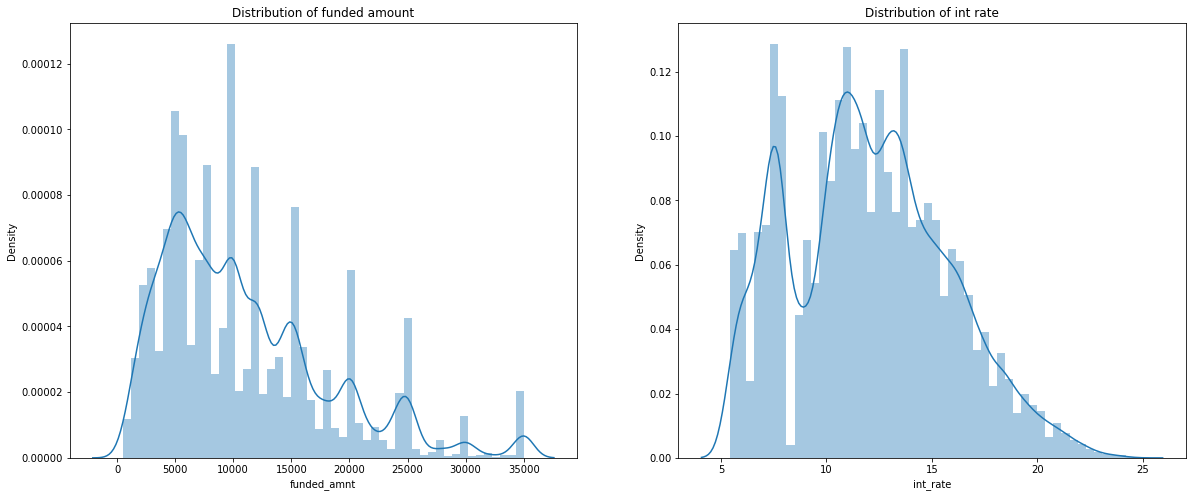

In [74]:
#Univariate Analysis on distribution of funded amount and interest rate
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
ax[0].set_title("Distribution of funded amount")
sns.distplot(df["funded_amnt"],ax=ax[0])

ax[1].set_title("Distribution of int rate")
sns.distplot(df["int_rate"],ax=ax[1])

#Conclusion: with this plot, 
# we can see that most of the funded amount range between 5000 to 12000 and no.of customers are reducing as the amount increases
# Most of the loan int range is spread between 8 to 14%

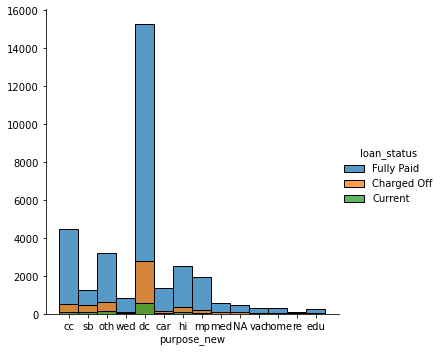

In [75]:
#histogram plot on purpose, loan_status
sns.FacetGrid(df, hue='loan_status', height=5).map(sns.histplot,"purpose_new").add_legend()

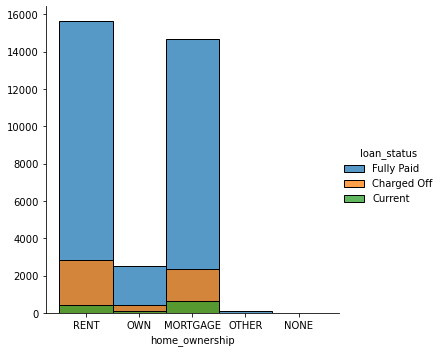

In [76]:
#histogram
sns.FacetGrid(df, hue='loan_status', height=5).map(sns.histplot,"home_ownership").add_legend()

In [77]:
df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc            

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

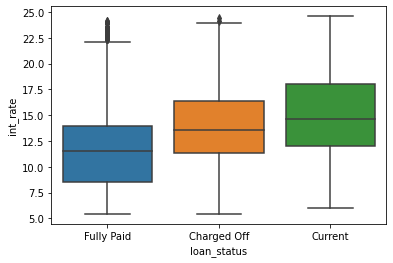

In [78]:
#Bivariate Analysis on interest rate and loan status
sns.boxplot(x="loan_status", y="int_rate", data=df)

#Based on the box plot below, customers with interest rate higher than 12 are more likely to be charged off. As we see, 
# there are no customers who have fully paid the loan with interest rate higher than 12, though we have few loans with current status.

<AxesSubplot:xlabel='loan_status', ylabel='inq_last_6mths'>

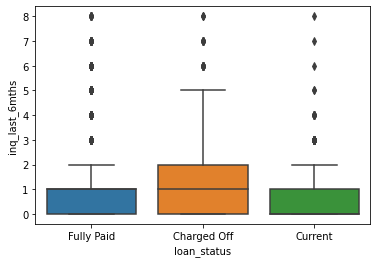

In [79]:
#Bivariate Analysis on inq_last_6mnths and loan status
sns.boxplot(x="loan_status", y="inq_last_6mths", data=df)

#Based on the box plot below, customers with enquiry more than once in last 6 months more likely to be charged off. As we see, 
# there are no cuurent loan customers with enquiry more than 1 since last 6 months.

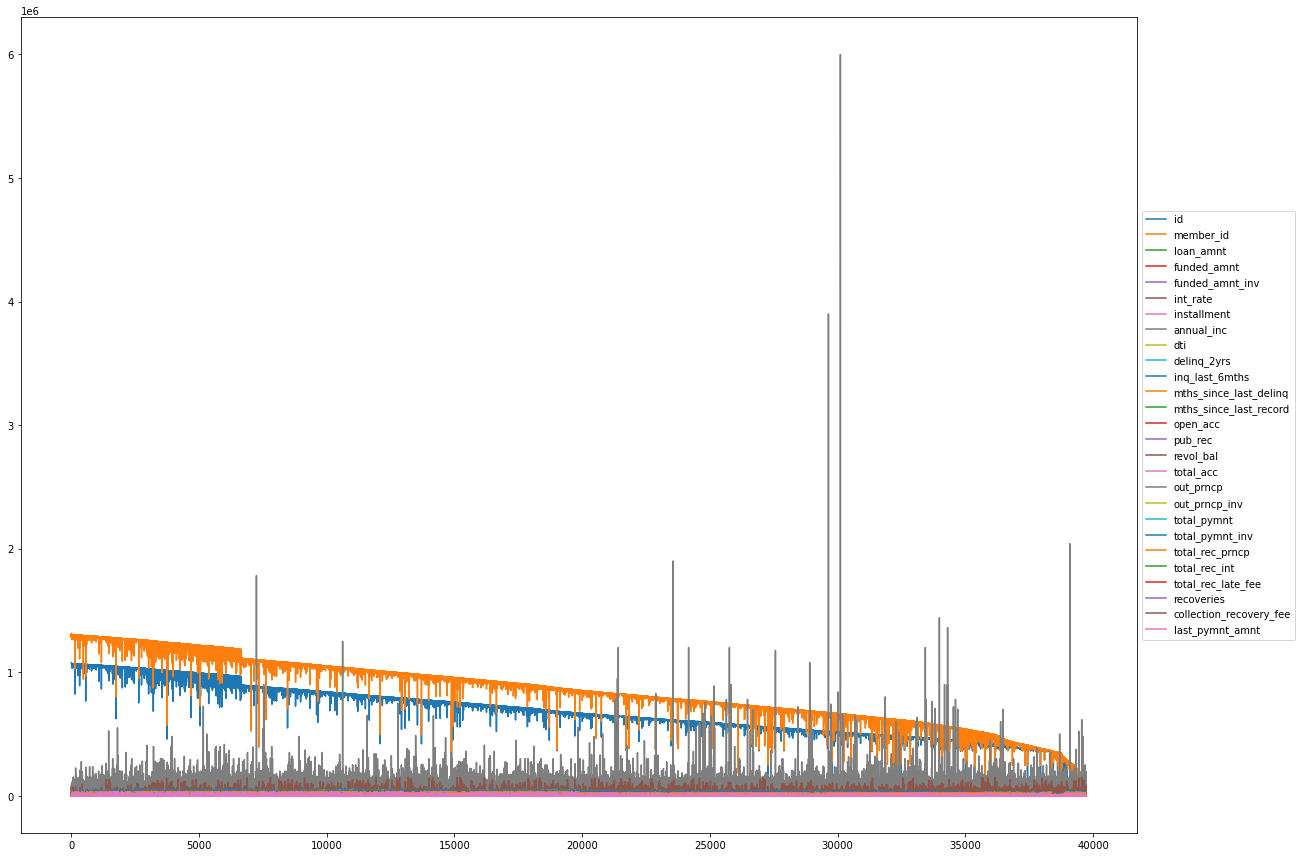

In [80]:
#multivariate analysis
ax = df.plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

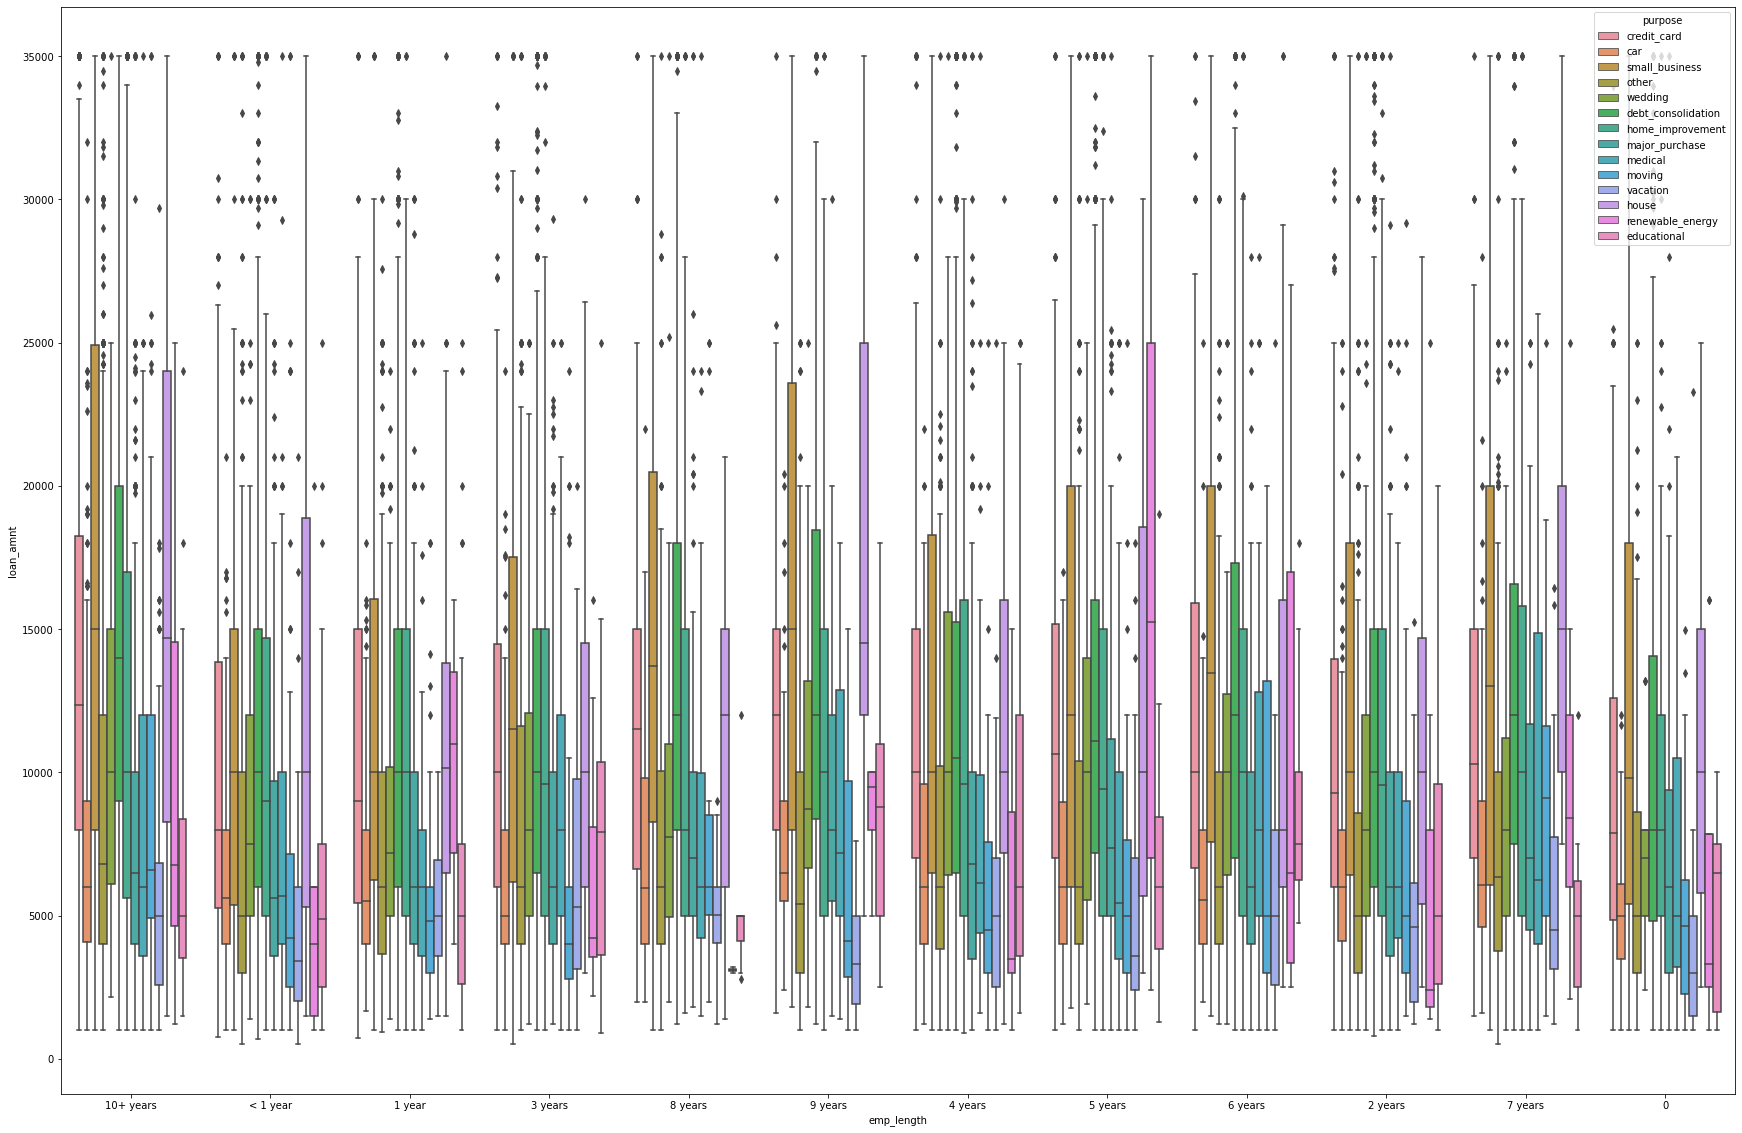

In [81]:
#multivariate analysis on emp_length, loan_amnt, purpose
ax = plt.figure(figsize=(30,20))
ax = sns.boxplot(x="emp_length", y="loan_amnt",hue="purpose",data=df)
plt.show()

#Based on the grpah = boxplot, we can see small business loan amount is higher followed by renewable energy and house